# Data Dive 2: Loading and Summarizing Data
### Tapping the Census API for Valuable Insights

The U.S. Census API is an extremely rich data source by itself, but also one that can enhance and provide insights into other datasets. In the first part of today's exercise, we'll put 

Helpful links:
* API [user guide](https://www.census.gov/data/developers/guidance/api-user-guide.html)
* [List](https://api.census.gov/data/2017/acs/acs5/variables.html) of census variables provided by the API. 
* [Sample queries](https://api.census.gov/data/2017/acs/acs5/examples.html) for different geographies
* [List](https://api.census.gov/data.html) of available apis
* The [Census Factfinder](https://factfinder.census.gov/faces/nav/jsf/pages/index.xhtml) is a great place to browse data or look up variable names.

Today we'll be using the 2017 ACS 5-year sample. The details of the different ACS samples are beyond the context of this class, but suffice to say that these estimates are built of five years of data from the ongoing ACS. 

The Census API, like many others, requires a *developer key* to use the API regularly. You can sign up for one [here](https://api.census.gov/data/key_signup.html). Thus far, I have not needed one for these exercises, but just to be on the safe side, it's nice to have one handy.  

In [1]:
import pandas as pd
import requests

# In case I need a key, I'll leave these here.
import os
census_key = os.getenv('CENSUS_KEY')


### Using the API

Some of the many useful variables in the ACS:
* `B01001_001E`: Total Population
* `B19013_001E`: Median Household Income
* `B25058_001E`: Median Rent
* `B01002_001E`: Median Age

We'll need the base url for the *endpoint*, in this case `https://api.census.gov/data/2016/acs/acs5?`, along with the relevant parameters in our query. The `requests` package has a handy feature that allows you to enter your parameters as a dictionary using the `params` argument.

In [13]:
url = 'https://api.census.gov/data/2017/acs/acs5?'
params = {'get' : 'NAME,B01001_001E,B19013_001E,B25058_001E',
          'for' : 'county:*',
          'in' : 'state:*'}

r = requests.get(url, params=params)
print(r.url)

https://api.census.gov/data/2017/acs/acs5?get=NAME%2CB01001_001E%2CB19013_001E%2CB25058_001E&for=county%3A%2A&in=state%3A%2A


Load our results into a data frame. In this case, we set the first row of results as the headers.

In [14]:
census_df = pd.DataFrame(r.json()[1:], columns=r.json()[0])

census_df.head(10)

,NAME,B01001_001E,B19013_001E,B25058_001E,state,county
0,"Corozal Municipio, Puerto Rico",34933,14752,354,72,047
1,"Maunabo Municipio, Puerto Rico",11297,17636,330,72,095
2,"Peñuelas Municipio, Puerto Rico",21661,16868,330,72,111
3,"Ponce Municipio, Puerto Rico",148863,16561,275,72,113
4,"San Sebastián Municipio, Puerto Rico",38970,14275,289,72,131
5,"Toa Alta Municipio, Puerto Rico",74169,29672,487,72,135
6,"Toa Baja Municipio, Puerto Rico",81905,24583,484,72,137
7,"Vieques Municipio, Puerto Rico",8931,16261,483,72,147
8,"Yabucoa Municipio, Puerto Rico",35025,15586,322,72,151
9,"Aguada Municipio, Puerto Rico",39470,16199,305,72,003


Let's clean things up a bit by renaming our columns and resetting the index

In [15]:
census_df["County Number"] = census_df.state.astype(str) + census_df.county.astype(str) 

census_df = (census_df
             .rename(
                 columns={'NAME' : 'County Name',
                          'B01001_001E' : 'Total Population',
                          'B19013_001E' : 'Median Household Income',
                          'B25058_001E' : 'Median Rent',
                          'state' : 'State',
                          'county' : 'County'
                         }
             )
             .set_index('County Name')
            )

for col in ['Median Household Income', 'Total Population', 'Median Rent']:
    census_df[col] = census_df[col].astype(int)
      
census_df['GEOID'] = (census_df['State'] + census_df['County']).astype(float)        
census_df.sort_values(by='Median Household Income', ascending=False).head(10)

,Total Population,Median Household Income,Median Rent,State,County,County Number,GEOID
County Name,,,,,,,
"Loudoun County, Virginia",374558,129588,1594,51,107,51107,51107.0
"Fairfax County, Virginia",1142004,117515,1707,51,059,51059,51059.0
"Howard County, Maryland",312495,115576,1485,24,027,24027,24027.0
"Falls Church city, Virginia",13843,114795,1683,51,610,51610,51610.0
"Arlington County, Virginia",229534,112138,1827,51,013,51013,51013.0
"Douglas County, Colorado",320940,111154,1420,08,035,08035,8035.0
"Hunterdon County, New Jersey",125717,110969,1218,34,019,34019,34019.0
"Los Alamos County, New Mexico",18031,110190,900,35,028,35028,35028.0
"Morris County, New Jersey",498847,107034,1306,34,027,34027,34027.0


#### Now we can start to have some fun by digging through the data. 

In [16]:
census_df.sort_values(by='Total Population', ascending=False).head(5)

,Total Population,Median Household Income,Median Rent,State,County,County Number,GEOID
County Name,,,,,,,
"Los Angeles County, California",10105722,61015,1210,06,037,06037,6037.0
"Cook County, Illinois",5238541,59426,911,17,031,17031,17031.0
"Harris County, Texas",4525519,57791,827,48,201,48201,48201.0
"Maricopa County, Arizona",4155501,58580,862,04,013,04013,4013.0
"San Diego County, California",3283665,70588,1381,06,073,06073,6073.0


### Writing to File
Pandas also has simple functionality to *write* to files, not just read from them. To write to a csv file to store our data, we can just use [`.to_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html).

In [17]:
census_df.to_csv('census_counties_backup.csv')

## Exercise: America's Oldest Counties

In [18]:
# todo: find america's oldest counties by median age

## Exercise: Visualize 

We can use `Altair` to create interactive cloropleth maps highlighting the variation in different demographic and socioeconomic indicators across the U.S. 

Working those around you, use the code in this notebook and the menu of available census variables available [here](https://api.census.gov/data/2017/acs/acs5/variables.html) to tell a story about a pattern of variation in the data. 

In [19]:
imUsingColab = False

if imUsingColab:
    !pip install altair

try:
    import altair as alt
    if imUsingColab:
        alt.renderers.enable('colab')
    else:
        alt.renderers.enable('notebook')    
    imUsingAltair = True
    print('Altair successfully loaded.')

except ModuleNotFoundError:
    imUsingAltair = False
    print('Altair loading failed. Will default to matplotlib.')


Altair successfully loaded.


In [20]:
def map_data(census_df, variable):
    
    '''
    This function creates an interactive cloropleth map using a census variable. 
    '''
    
    census_df = census_df.reset_index()
    
    
    val = pd.read_csv('https://grantmlong.com/data/census_validation.csv', names=['id'])

    cf = val.merge(
        census_df.loc[
            census_df[variable]>-1000000,
            ['GEOID', variable, 'County Name']],
        left_on='id',
        right_on='GEOID',
        how='left'
    )
    
    counties = alt.topo_feature(
        'https://vega.github.io/vega-datasets/data/us-10m.json', 
        'counties'
    )

    census = alt.LookupData(cf, 'id', [variable, 'County Name'])

    census_map = alt.Chart(
        counties
    ).mark_geoshape(
    ).encode(
        color='{variable}:Q'.format(variable=variable),
        tooltip=[
            '{variable}:Q'.format(variable=variable),
            'County Name:N',
        ]
    ).transform_lookup(
        lookup='id',
        from_= census
    ).project(
        type='albersUsa'
    ).properties(
        width=850,
        height=500
    )
    
    return census_map
    

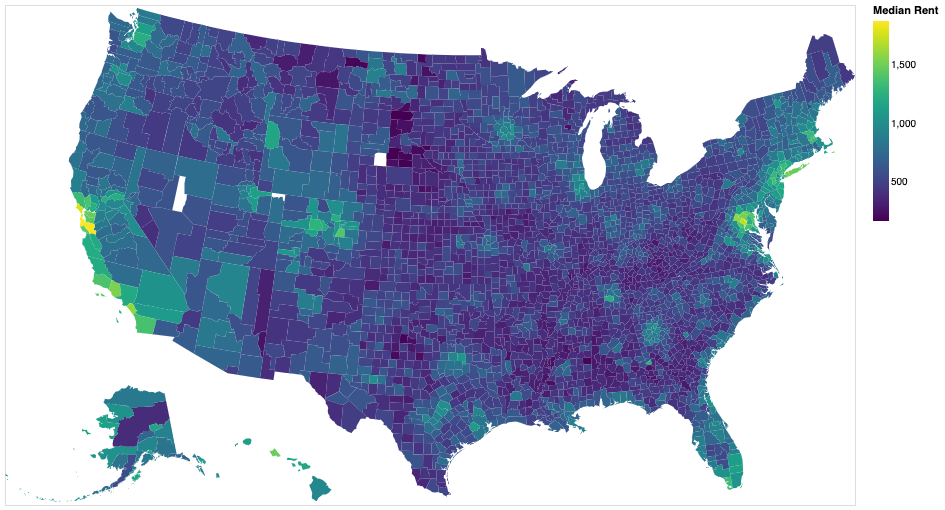

In [21]:
map_data(census_df, 'Median Rent')